In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = kagglehub.dataset_download("kaggle/sf-salaries")

In [ ]:
print(path)

In [ ]:
data = pd.read_csv(f"{path}/Salaries.csv", low_memory=False)

In [ ]:
data.info()

In [ ]:
data = data.drop(columns=['Id'])

In [ ]:
data['BasePay'] = pd.to_numeric(data['BasePay'], errors='coerce')
data['OvertimePay'] = pd.to_numeric(data['OvertimePay'], errors='coerce')
data['OtherPay'] = pd.to_numeric(data['OtherPay'], errors='coerce')

data['TotalSalary'] = data['BasePay'].fillna(0) + data['OvertimePay'].fillna(0) + data['OtherPay'].fillna(0)

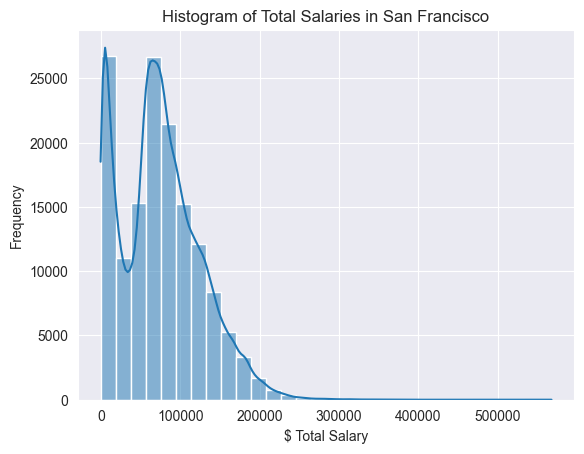

In [67]:
sns.histplot(data['TotalSalary'],  bins=30,  kde=True)
plt.xlabel("$ Total Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Total Salaries in San Francisco")
plt.show()

In [77]:
total_salary = data['TotalSalary'].dropna()

min_val = total_salary.min()
q1 = total_salary.quantile(0.25)
q2 = total_salary.median()
q3 = total_salary.quantile(0.75)
max_val = total_salary.max()
mean_val = total_salary.mean()
sd_val = total_salary.std()
n = int(total_salary.count())
iqr = q3 - q1

stats_df = pd.DataFrame({
    "Statistic": ["Min", "Q1", "Median (Q2)", "Q3", "Max", "Mean", "Standard Deviation", "Count", "IQR"],
    "Value": [min_val, q1, q2, q3, max_val, mean_val, sd_val, n, iqr]
})

In [78]:
stats_df

,Statistic,Value
0,Min,-618.130000
1,Q1,36168.995000
2,Median (Q2),71426.610000
3,Q3,105839.135000
4,Max,567595.430000
5,Mean,74768.321972
6,Standard Deviation,50517.005274
7,Count,148654.000000
8,IQR,69670.140000
